In [4]:
%matplotlib inline
import pandas as pd
import random
import re
from IPython.display import clear_output
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale

In [5]:
train1M = pd.read_csv('train1M.csv',index_col = 0)

In [6]:
train1M.head()

,label,integer_1,integer_2,integer_3,integer_4,integer_5,integer_6,integer_7,integer_8,integer_9,...,categorical_18,categorical_19,categorical_20,categorical_21,categorical_22,categorical_23,categorical_24,categorical_25,categorical_26,Index
19,0,7.0,102,NaN,3.0,780.0,15.0,7.0,15.0,15.0,...,5edd90de,NaN,NaN,e12ce348,NaN,c3dc6cef,49045073,NaN,NaN,19
135,0,NaN,0,17.0,3.0,19811.0,NaN,0.0,3.0,54.0,...,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,32c7478e,43f13e8b,ea9a246c,731c3655,135
177,0,NaN,1,5.0,4.0,2931.0,36.0,2.0,6.0,62.0,...,0f4a15b0,NaN,NaN,0014c32a,NaN,3a171ecb,3b183c5c,NaN,NaN,177
250,0,NaN,0,NaN,0.0,40698.0,963.0,0.0,2.0,23.0,...,281769c2,NaN,NaN,d4703ebd,NaN,32c7478e,aee52b6f,NaN,NaN,250
329,1,NaN,23,83.0,2.0,NaN,NaN,0.0,2.0,2.0,...,f54016b9,21ddcdc9,5840adea,ff3ce4c0,c9d4222a,be7c41b4,d691765a,e8b83407,d1d45fc5,329


# 2.2 Histograms and Stats

In [40]:
def generateSummaryStatsAndHists(train1M):
    SummaryStats = pd.DataFrame()
    for col in train1M.columns:
        if (col != 'label' and col != 'Index' and col != 'Unnamed: 0'):

            train1M[col][train1M['label'] == 0].value_counts().plot(kind='hist',title=col, bins=100,label='0s')
            train1M[col][train1M['label'] == 1].value_counts().plot(kind='hist',title=col, bins=100,label='1s')
            plt.legend(loc='upper right')
            plt.savefig(col)
            plt.show()
            plt.gcf().clear()
            if (train1M[col].dtype != 'O'):
                SummaryStats[col] = train1M[col].describe()   
    # SummaryStats.head()
    SummaryStats.to_csv('integerStats.csv')
    return SummaryStats

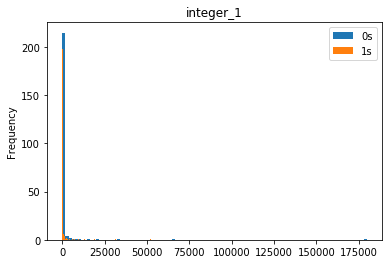

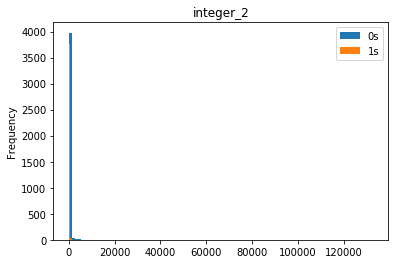

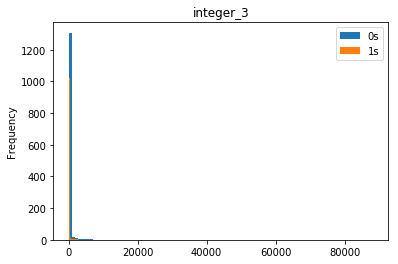

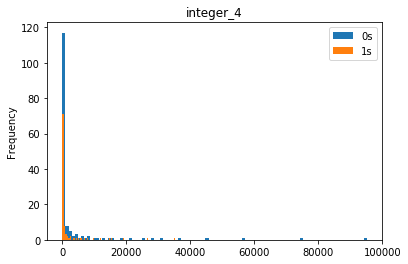

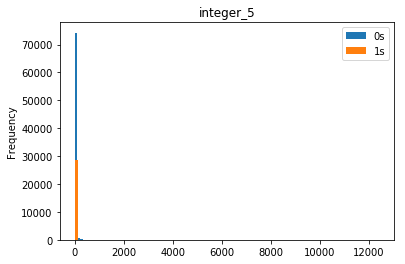

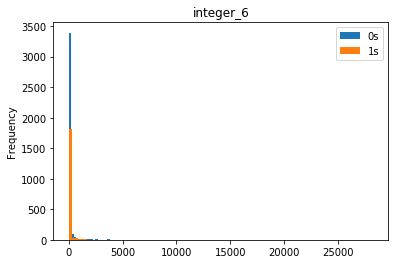

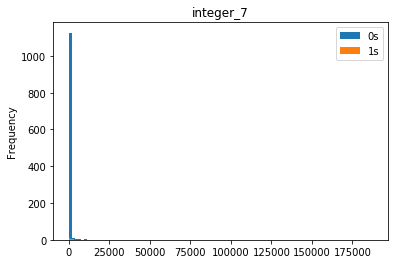

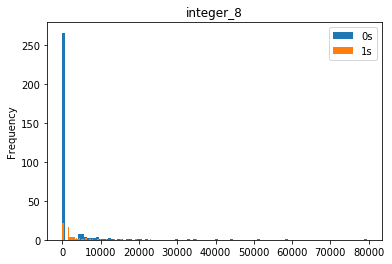

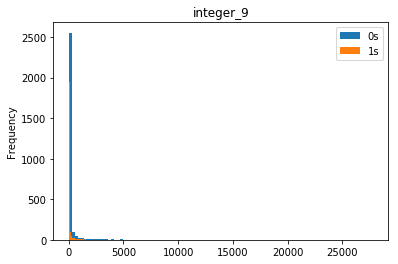

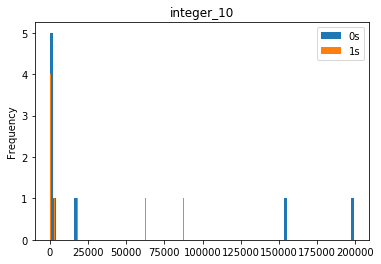

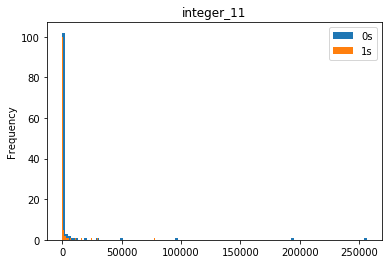

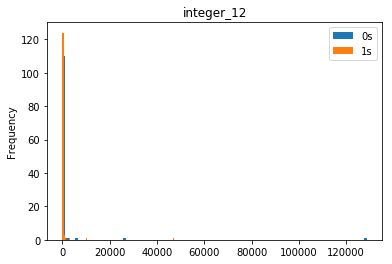

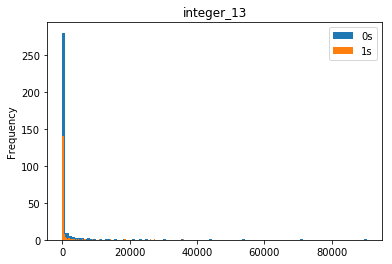

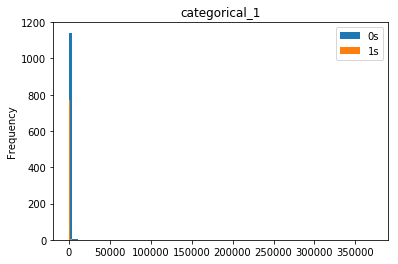

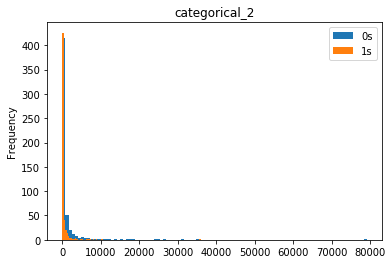

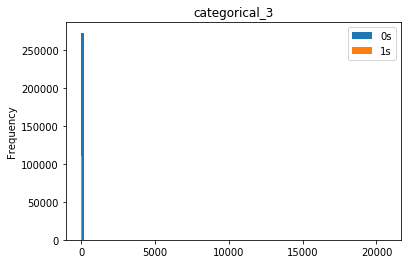

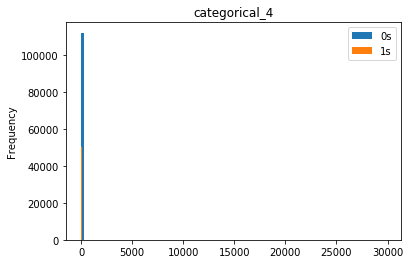

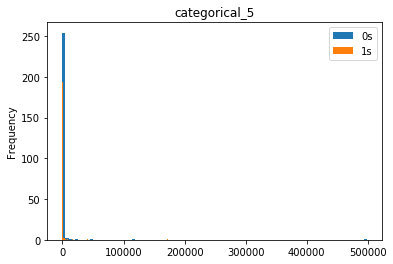

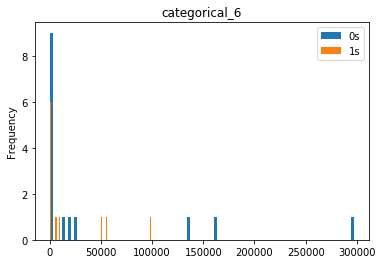

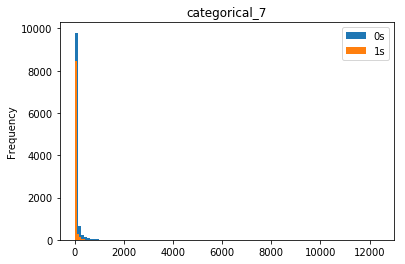

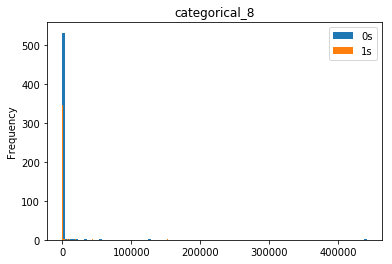

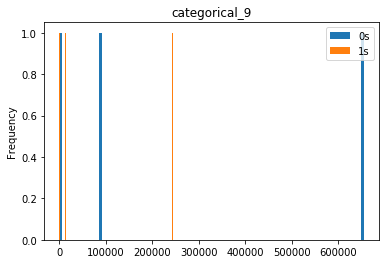

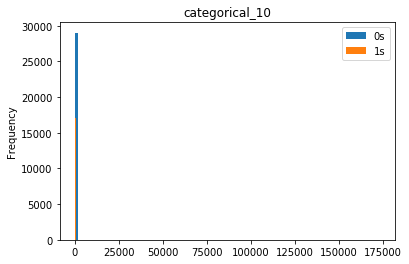

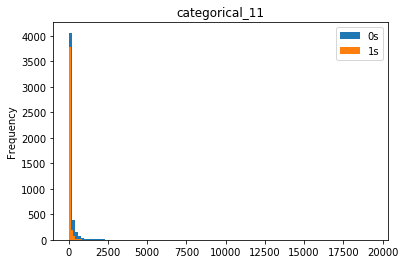

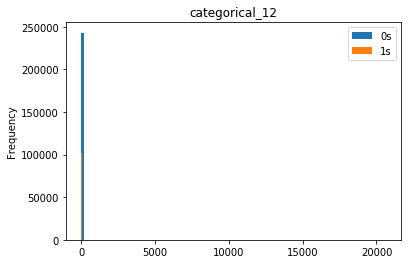

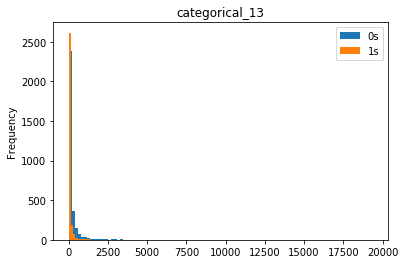

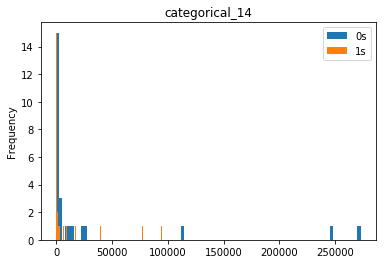

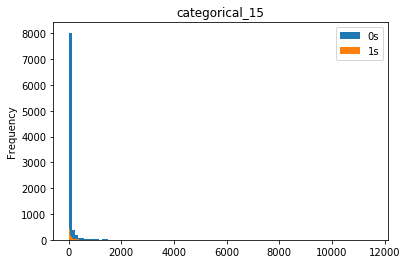

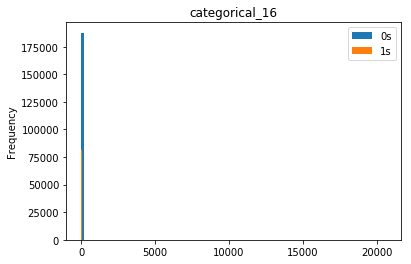

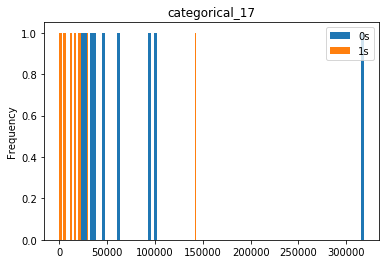

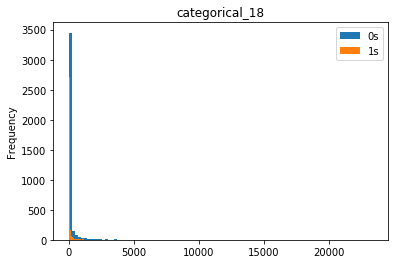

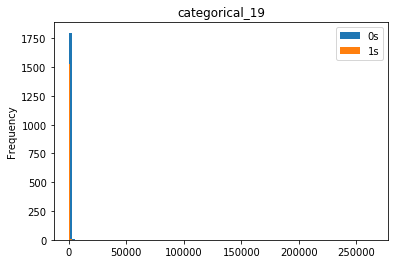

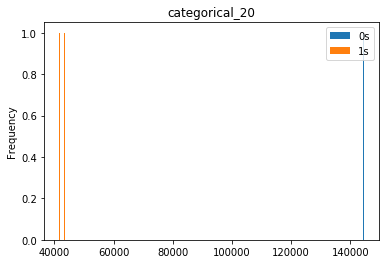

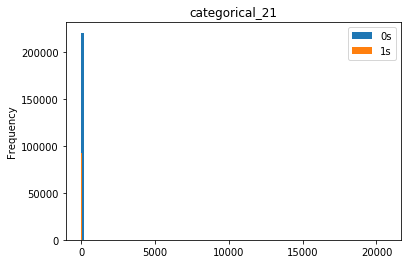

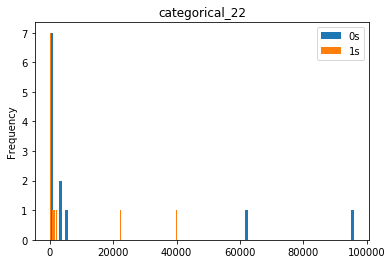

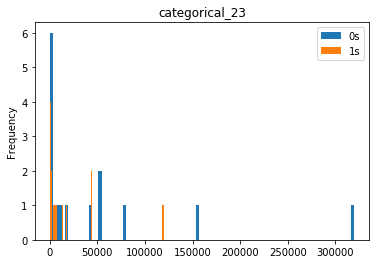

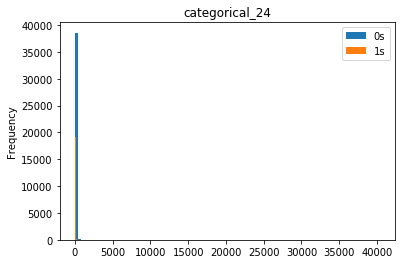

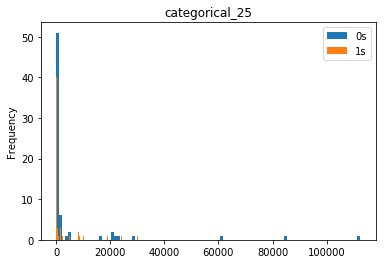

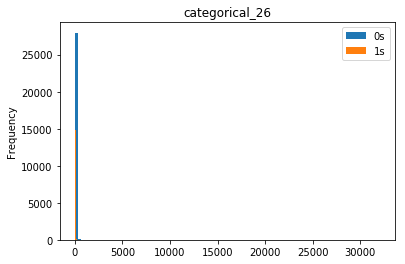

,integer_1,integer_2,integer_3,integer_4,integer_5,integer_6,integer_7,integer_8,integer_9,integer_10,integer_11,integer_12,integer_13
count,547351.000000,1000000.000000,785154.000000,782791.000000,9.745330e+05,777146.000000,956983.000000,999512.000000,956983.000000,547351.000000,956983.000000,235572.000000,782791.000000
mean,3.506584,106.377807,27.065321,7.315527,1.864183e+04,115.039034,16.442098,12.512986,106.179319,0.616889,2.732943,0.988131,8.199752
std,9.752981,392.962915,402.800192,8.781313,7.002784e+04,315.677901,77.506505,16.608903,220.433666,0.683757,5.195889,4.929478,15.480945
min,0.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,2.000000,3.250000e+02,8.000000,1.000000,2.000000,10.000000,0.000000,1.000000,0.000000,2.000000
50%,1.000000,3.000000,6.000000,4.000000,2.812000e+03,32.000000,3.000000,7.000000,38.000000,1.000000,1.000000,0.000000,4.000000
75%,3.000000,35.000000,18.000000,10.000000,1.011600e+04,102.000000,11.000000,19.000000,110.000000,1.000000,3.000000,1.000000,10.000000
max,2344.000000,27673.000000,65535.000000,683.000000,2.513122e+06,45918.000000,34536.000000,4985.000000,17556.000000,8.000000,148.000000,293.000000,4375.000000


In [41]:
SummaryStats = generateSummaryStatsAndHists(train1M)
SummaryStats

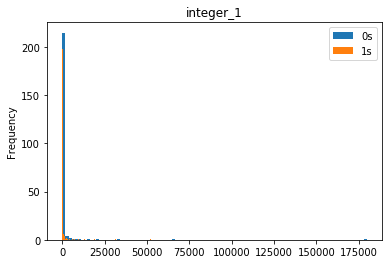

In [37]:
train1M['integer_1'][train1M['label'] == 0].value_counts().plot(kind='hist',title='integer_1', bins=100,label='0s')
train1M['integer_1'][train1M['label'] == 1].value_counts().plot(kind='hist',title='integer_1', bins=100,label='1s')
plt.legend(loc='upper right')
plt.show()

# 2.3 Normalization and Feature Engineering

In [4]:
# train1M.head()

In [5]:
# train1M[train1M[train1M.columns[1:14]] == -1]

In [6]:
# Keeping the following categorical features:
# - 9 Because it has 3 distinct peaks
# - 6 because both peaks and >9 points

# Dropping the following categorical features because 
# - Categorical_1 b/c they all have only 1 column for most features 
# - 3
# - 4 
# - 8
# - 10
# - 12
# - 16
# - 19
# - 21
# - 24
# - 26



In [7]:
# encoder = OneHotEncoder()
# encoder.fit_transform(train1M[train1M.columns[14]])
train1M[train1M.columns[14]].dtype

def generateCategoricalData(train1M):
    #change to categorical
    for col in train1M.columns[14:40]:
        train1M[col] = train1M[col].astype('category')
        # add the dummy category
        train1M[col].cat.add_categories(new_categories = 'Dummy',inplace = True)
        categories = pd.Series(train1M[col].cat.categories)
        categories.to_csv(str(col)+'_features.csv',header = False)
        #save the categories for each column
        #then we can set the categegories for each column
        # and when we get dummies from pandas we have a one hot encoding that is consistent accross
        # -> get_dummies() method does one hot encoding
        
generateCategoricalData(train1M)

In [8]:
def preProcessData(train1M):
    train1M[train1M.columns[1:14]] = train1M[train1M.columns[1:14]].fillna(0)
    train1M[train1M.columns[14:40]] = train1M[train1M.columns[14:40]].fillna('Dummy')
    train1M[train1M.columns[1:14]] = train1M[train1M.columns[1:14]].replace(-1,0)

def dropFeature(series,feature):
    
    for index, value in series.iteritems():
        if (value == feature):
#             print('index: ', index, 'value: ', value)
            series = series.drop(index)
            return series            
    return -1

def preProcessInts():
    # mean-center and unit variance the integers
    train1M[train1M.columns[1:14]] = scale(train1M[train1M.columns[1:14]])

preProcessData(train1M)

preProcessInts()


featuresToKeep = pd.Series(data = train1M.columns)
# print(featuresToKeep)
featuresToKeep = dropFeature(featuresToKeep,'Index')
featuresToKeep = dropFeature(featuresToKeep,'label')
featuresToKeep = dropFeature(featuresToKeep,'categorical_1')
featuresToKeep = dropFeature(featuresToKeep,'categorical_3')
featuresToKeep = dropFeature(featuresToKeep,'categorical_4')
featuresToKeep = dropFeature(featuresToKeep,'categorical_5')
featuresToKeep = dropFeature(featuresToKeep,'categorical_8')
featuresToKeep = dropFeature(featuresToKeep,'categorical_10')
featuresToKeep = dropFeature(featuresToKeep,'categorical_12')
featuresToKeep = dropFeature(featuresToKeep,'categorical_16')
featuresToKeep = dropFeature(featuresToKeep,'categorical_19')
featuresToKeep = dropFeature(featuresToKeep,'categorical_21')
featuresToKeep = dropFeature(featuresToKeep,'categorical_24')
featuresToKeep = dropFeature(featuresToKeep,'categorical_26')

featuresToKeep.to_csv('features.txt',header=False, index=False)

In [9]:
#Now that I have my kept features:

In [10]:
# #generate the list of features and assign an integer value to them (the index is the integer value)
# for col in train1M.columns[14:40]:
#     print(train1M[col].cat.categories)
#     print(train1M[col].cat.codes)
#     pd.Series(train1M[col].cat.categories, index=train1M[col].cat.codes).to_csv(str(col)+'_features.csv',header = False)

In [ ]:
for col in train1M.columns[14:40]:
    # load the current Feature spaces
    curFeatures = pd.read_csv(str(col) + "_features.csv",header = None,index_col = 0)
    
    print(pd.get_dummies(train1M[col],prefix=['encoded']).values)
    
#     print("done 1")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
train1M.head()

In [46]:
train1M['categorical_1']

19          3c9d8785
135         05db9164
177         05db9164
250         05db9164
329         8cf07265
425         05db9164
466         05db9164
487         87552397
551         68fd1e64
559         05db9164
622         f473b8dc
695         68fd1e64
706         5a9ed9b0
713         8cf07265
791         68fd1e64
817         68fd1e64
868         05db9164
891         68fd1e64
904         87552397
990         68fd1e64
1040        b455c6d7
1159        05db9164
1175        241546e0
1276        05db9164
1281        05db9164
1302        68fd1e64
1305        5a9ed9b0
1325        05db9164
1353        05db9164
1368        05db9164
              ...   
45839434    05db9164
45839455    68fd1e64
45839547    05db9164
45839574    05db9164
45839681    439a44a4
45839685    09ca0b81
45839718    05db9164
45839760    05db9164
45839767    05db9164
45839800    68fd1e64
45839818    68fd1e64
45839885    68fd1e64
45839935    8cf07265
45839960    05db9164
45839976    68fd1e64
45839998    05db9164
45840015    0